In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')
import defs as d
os.chdir('./notebooks')
import seaborn as sns
#日本語対応
sns.set(font='Osaka')
%matplotlib inline
%precision 3

'%.3f'

In [2]:
os.chdir('../datasource')
import base_data as bd
import prefecture_data as prefd
os.chdir('../notebooks')

In [25]:
%%time
prefecture_df = prefd.read_prefecture_data('../data/interim/2020-07-29')
prefecture_df

CPU times: user 3.17 ms, sys: 15.5 ms, total: 18.7 ms
Wall time: 44.9 ms


,year,month,date,prefectureNameJ,prefectureNameE,testedPositive,peopleTested,discharged,deaths
0,2020,3,11,愛知県,Aichi,104,274,0,0
1,2020,3,12,愛知県,Aichi,111,1009,0,0
2,2020,3,13,愛知県,Aichi,114,1103,0,0
3,2020,3,14,愛知県,Aichi,121,1103,0,0
4,2020,3,15,愛知県,Aichi,121,1103,0,0
...,...,...,...,...,...,...,...,...,...
6575,2020,7,24,山梨県,Yamanashi,85,6805,76,1
6576,2020,7,25,山梨県,Yamanashi,85,6805,76,1
6577,2020,7,26,山梨県,Yamanashi,85,6805,76,1
6578,2020,7,27,山梨県,Yamanashi,88,6968,77,1


In [35]:
%%time
prefectures = prefecture_df['prefectureNameE'].unique()
prefecture_df['year'] = prefecture_df['year'].astype(str)
prefecture_df['month'] = prefecture_df['month'].astype(str).str.pad(2, fillchar='0')
prefecture_df['date'] = prefecture_df['date'].astype(str).str.pad(2, fillchar='0')
prefecture_df['Date'] = pd.to_datetime(prefecture_df['year'] + '-' + prefecture_df['month'] + '-' + prefecture_df['date'])
prefecture_df

CPU times: user 15.5 ms, sys: 2.04 ms, total: 17.6 ms
Wall time: 18 ms


,year,month,date,prefectureNameJ,prefectureNameE,testedPositive,peopleTested,discharged,deaths,Date
0,2020,03,11,愛知県,Aichi,104,274,0,0,2020-03-11
1,2020,03,12,愛知県,Aichi,111,1009,0,0,2020-03-12
2,2020,03,13,愛知県,Aichi,114,1103,0,0,2020-03-13
3,2020,03,14,愛知県,Aichi,121,1103,0,0,2020-03-14
4,2020,03,15,愛知県,Aichi,121,1103,0,0,2020-03-15
...,...,...,...,...,...,...,...,...,...,...
6575,2020,07,24,山梨県,Yamanashi,85,6805,76,1,2020-07-24
6576,2020,07,25,山梨県,Yamanashi,85,6805,76,1,2020-07-25
6577,2020,07,26,山梨県,Yamanashi,85,6805,76,1,2020-07-26
6578,2020,07,27,山梨県,Yamanashi,88,6968,77,1,2020-07-27


Tokyo 5739    328
Name: deaths, dtype: int64
Saitama 4899    72
Name: deaths, dtype: int64
Kanagawa 2659    98
Name: deaths, dtype: int64
Tochigi 5459    0
Name: deaths, dtype: int64
Chiba 559    48
Name: deaths, dtype: int64
Hyogo 1819    45
Name: deaths, dtype: int64
Osaka 4619    88
Name: deaths, dtype: int64
Aichi 139    35
Name: deaths, dtype: int64
Gifu 1259    7
Name: deaths, dtype: int64
CPU times: user 745 ms, sys: 46.3 ms, total: 792 ms
Wall time: 821 ms


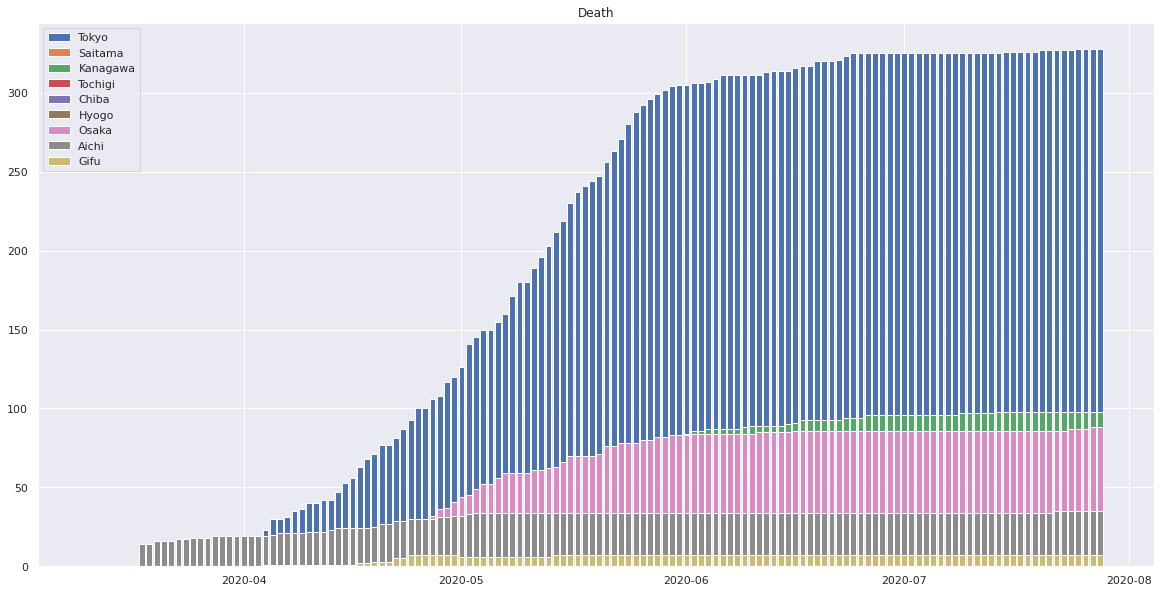

In [51]:
%%time
prefectures_df = prefecture_df.groupby('prefectureNameE')
prefectures = ['Tokyo', 'Saitama', 'Kanagawa', 'Tochigi', 'Chiba', 'Hyogo', 'Osaka', 'Aichi', 'Gifu']
plt.figure(figsize=(20, 10))
plt.title('Death')
for prefecture in prefectures:
    target_pref = prefectures_df.get_group(prefecture)
    print(prefecture, target_pref.tail(1)['deaths'])
    plt.bar(target_pref['Date'], target_pref['deaths'], label=f'{prefecture}')
plt.legend()

start
CPU times: user 631 ms, sys: 28.2 ms, total: 659 ms
Wall time: 686 ms


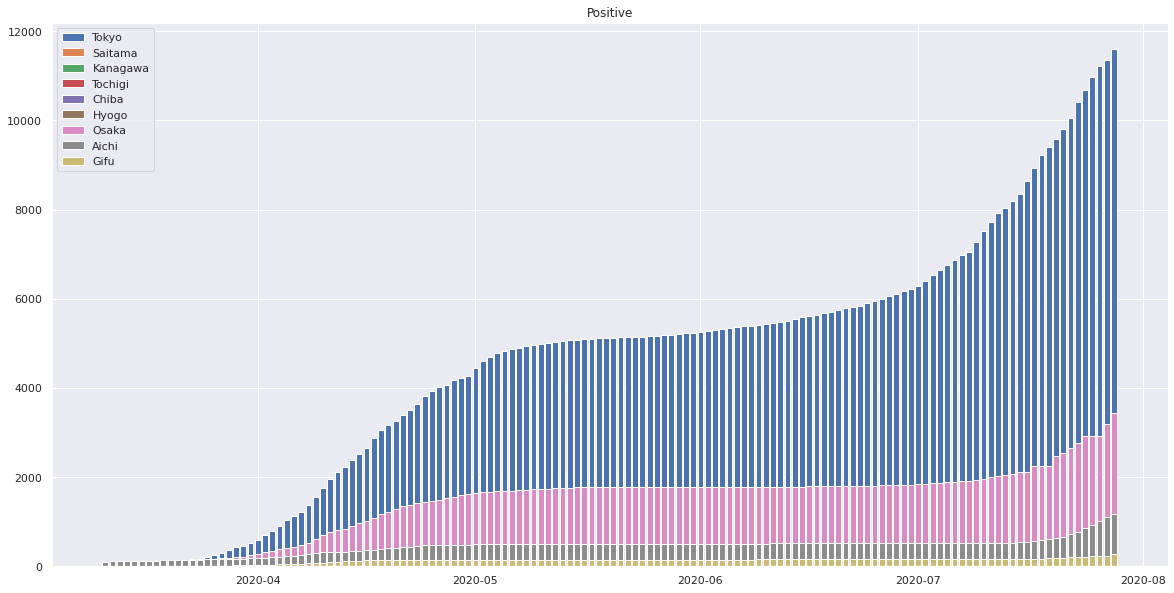

In [52]:
%%time
print('start')
plt.figure(figsize=(20, 10))
plt.title('Positive')
for prefecture in prefectures:
    target_pref = prefectures_df.get_group(prefecture)
    plt.bar(target_pref['Date'], target_pref['testedPositive'], label=f'{prefecture}')
plt.legend()